******************* get_test_heatmap start *******************
load file </var/storage/shared/pnrsy/t-jiwan/DetectAndTrack-wjb/tools/show_results/01_R101_best_hungarian-4GPU.yaml_nms=0.500000_score=_0.050000_drop_low_conf=0.950000/image_file/images\bonn_5sec\000342_mpii\00000064.jpg.json> heatmap data!

the heatmaps shape in one image: (2, 17, 56, 56)
the numbers of heatmaps in one image:  34
******************* get_test_heatmap end *******************
(480, 854, 3)


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


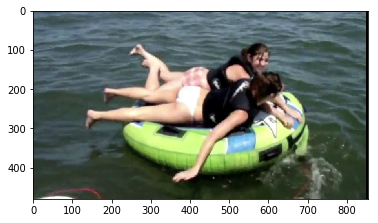

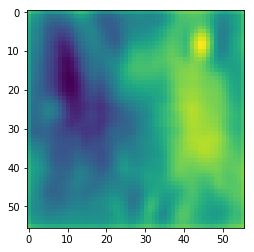

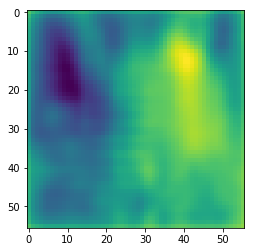

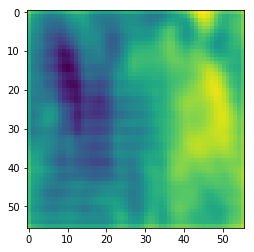

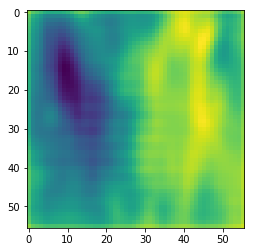

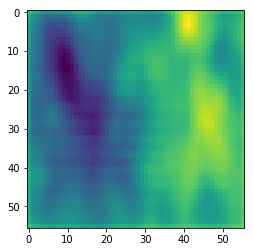

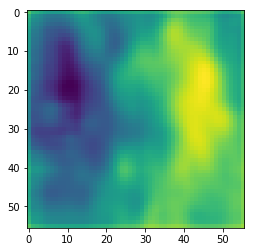

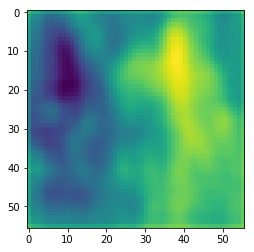

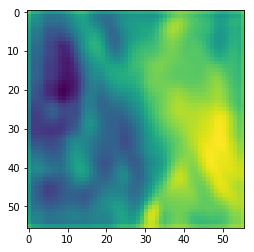

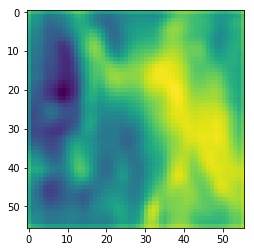

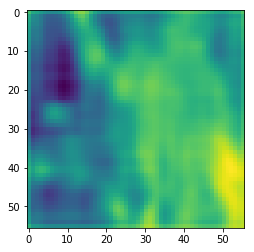

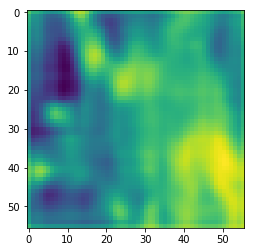

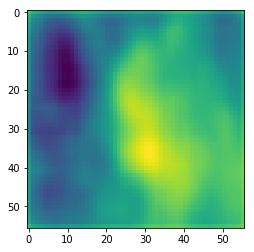

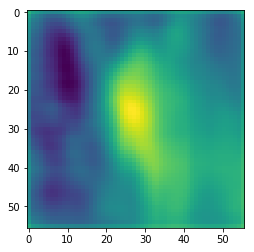

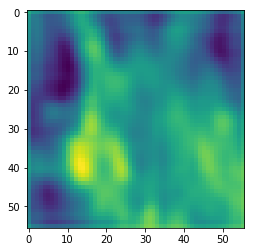

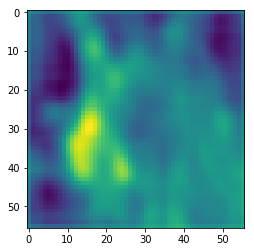

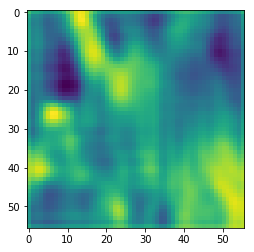

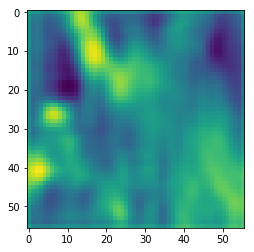

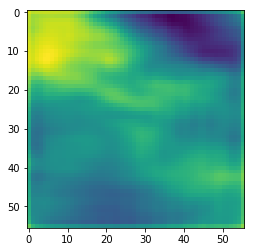

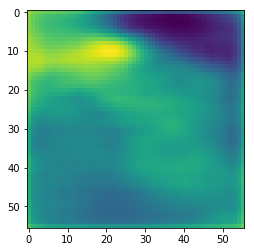

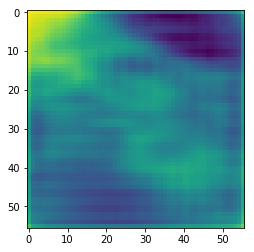

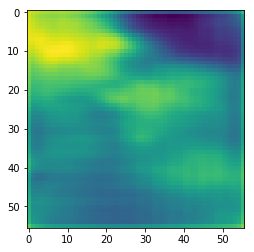

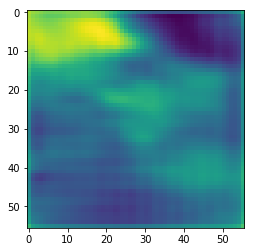

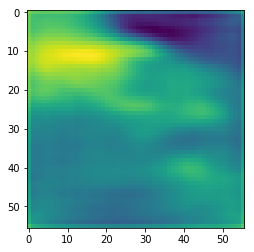

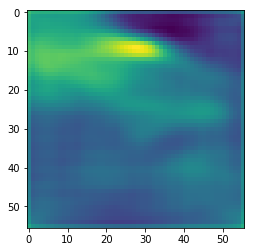

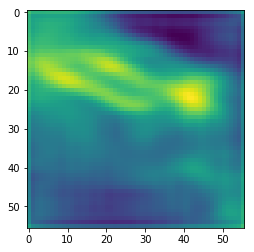

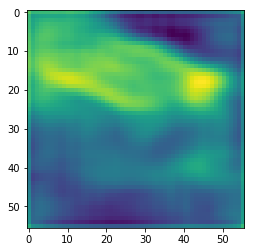

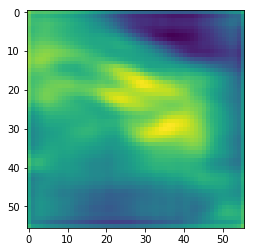

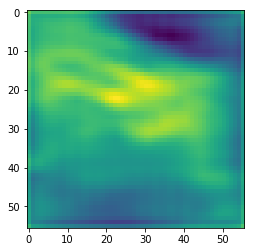

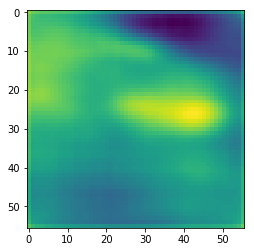

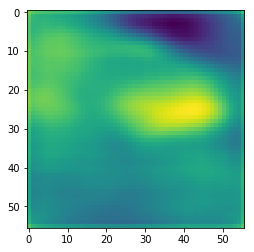

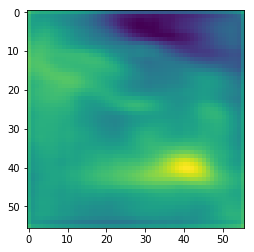

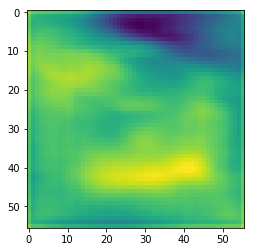

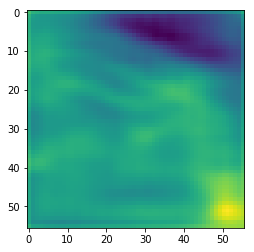

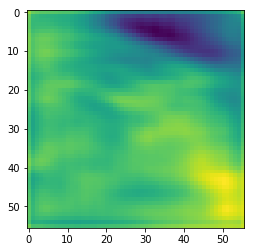

In [43]:
import numpy as np
import json
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


def get_test_heatmap(image_heatmap_json_file_path):
    print("******************* get_test_heatmap start *******************")
    if not os.path.exists(image_heatmap_json_file_path):
        print("******* the file <"+image_heatmap_json_file_path+"> is not exists!*******\n")
    print("load file <"+image_heatmap_json_file_path+"> heatmap data!")
    
    heatmaps_all_one_image=[]
    keypoints_all_one_image=[]
    
    
    with open(image_heatmap_json_file_path) as data_file:
        data=json.load(data_file)
        
    #find the image name
    image_name=data["image_name"]
    
    #find the bbox of all people in this image
    detect_bbox=data["detect"]
    
    
    #find keypoints
    kps=data["keypoints"]
    for pidx in range(len(kps)):
        kps_one_person=kps[pidx]
        keypoints_all_one_image.append(kps_one_person)
    
    #find heatmaps
    heatmaps=data["heatmaps"]
    heatmaps_np=np.asarray(heatmaps)
    print("\nthe heatmaps shape in one image:",heatmaps_np.shape)
    for personidx in range(len(heatmaps)):
        for heatmapidx in range(len(heatmaps[personidx])):
            heatmap=heatmaps[personidx][heatmapidx]
            heatmaps_all_one_image.append(heatmap)
            
    print("the numbers of heatmaps in one image: ",len(heatmaps_all_one_image))

    print("******************* get_test_heatmap end *******************")
    return image_name,heatmaps_all_one_image




def visualize_one_heatmap(heatmap):
    figure=plt.figure()
    plt.imshow(heatmap)

    
    
    
    
    
image_json_file_root="/var/storage/shared/pnrsy/t-jiwan/DetectAndTrack-wjb/tools/show_results/01_R101_best_hungarian-4GPU.yaml_nms=0.500000_score=_0.050000_drop_low_conf=0.950000/image_file/"
image_origin_root="/var/storage/shared/pnrsy/t-jiwan/DetectAndTrack-wjb/"
file_name="images\\bonn_5sec\\000342_mpii\\00000064.jpg.json"



image_name,heatmaps=get_test_heatmap(image_json_file_root+file_name)

img=mpimg.imread(image_origin_root+image_name)
print(img.shape)
plt.imshow(img)

for heatmap in heatmaps:
    visualize_one_heatmap(heatmap)




    
    


The following command must be run outside of the IPython shell:

    $ pip list

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
